In [8]:
%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import matplotlib.patches as mpatch
import matplotlib.patheffects as path_effects
import numpy as np


In [ ]:
neurons = ['AS', 'DA', 'DB', 'DD', 'VD', 'VB', 'VA']
[AS, DA, DB, DD, VD, VB, VA] = [0, 1, 2, 3, 4, 5, 6]

xloc = [5, 1, 9, 7.5, 2.5, 8.5, 1.5]
yloc = [18, 13, 13, 10, 7.5, 2, 1]
labels, positions = [], []
for seg in [0, 1]:
    for i in range(7):
        labels.append('%s'%(neurons[i]))
        positions.append([20 * seg + xloc[i], yloc[i]])
        
R = 1.2
Rs = 1.35

In [50]:
[AS, DA, DB, DD, VD, VB, VA] = [0, 1, 2, 3, 4, 5, 6]

object_fontsize = 45

neurons = ['AS', 'DA', 'DB', 'DD', 'VD', 'VB', 'VA']
n_classes = [7, 7, 7, 7, 7, 7, 7]

col = ['#cc66cc','#d8b365', '#5ab4ac', '#42a4d1', '#99ccff', '#01665e', '#8c510a']

xo = [5, 1, 9, 7.5, 2.5, 8.5, 1.5] # Determines THE X position of the subunit cells

yloc = [18, 13, 13, 10, 7.5, 3, 2] # Determines the Y posotion

unitpos = [-5, 2.0,     17.0, 17.0, 17.0,         17.3, 14.5] 
#unitpos = [-5, 2.0,     17.0, 15.0, 17.0,         30.3, 2.5] # Detemines in what position is each unit

labels, positions, colors = [], [], []
lab = [['%s'%(neurons[i]) for numb in range(1, 1+n_classes[i])] for i in range(7)]
#print(lab)
pos = [[[x, yloc[i]] for x in xo[i]+np.cumsum(unitpos)] for i in range(7)]
#print(pos)
colo = [[col[i] for x in range(n_classes[i])] for i in range(7)]
for j in range(7):
    for i in range(7):
        labels.append(lab[i][j])
        positions.append(pos[i][j])
        colors.append(colo[i][j])
print(labels)
print(positions)
print(colors)
mus_loc_x = np.linspace(-26.5, 104, 24)
muscle_location = []
muscle_names = []
for i in range(12):
    muscle_location.append([mus_loc_x[i*2], 20.70, 'DM %.2d'%(i*2 + 1)])
    muscle_names.append('D %.2d'%(i*2 + 1))
    muscle_location.append([mus_loc_x[i*2], -0.70, 'VM %.2d'%(i*2 + 1)])
    muscle_names.append('V %.2d'%(i*2 + 1))
    muscle_location.append([mus_loc_x[i*2+1], 22.00, 'DM %.2d'%(i*2 + 2)])
    muscle_names.append('D %.2d'%(i*2 + 2))
    muscle_location.append([mus_loc_x[i*2+1], -2.00, 'VM %.2d'%(i*2 + 2)])
    muscle_names.append('V %.2d'%(i*2 + 2))

muscles_names = list(np.array(muscle_location)[:,2])
print(muscles_names)

['AS', 'DA', 'DB', 'DD', 'VD', 'VB', 'VA', 'AS', 'DA', 'DB', 'DD', 'VD', 'VB', 'VA', 'AS', 'DA', 'DB', 'DD', 'VD', 'VB', 'VA', 'AS', 'DA', 'DB', 'DD', 'VD', 'VB', 'VA', 'AS', 'DA', 'DB', 'DD', 'VD', 'VB', 'VA', 'AS', 'DA', 'DB', 'DD', 'VD', 'VB', 'VA', 'AS', 'DA', 'DB', 'DD', 'VD', 'VB', 'VA']
[[0.0, 18], [-4.0, 13], [4.0, 13], [2.5, 10], [-2.5, 7.5], [3.5, 3], [-3.5, 2], [2.0, 18], [-2.0, 13], [6.0, 13], [4.5, 10], [-0.5, 7.5], [5.5, 3], [-1.5, 2], [4.0, 18], [0.0, 13], [8.0, 13], [6.5, 10], [1.5, 7.5], [7.5, 3], [0.5, 2], [34.0, 18], [30.0, 13], [38.0, 13], [36.5, 10], [31.5, 7.5], [37.5, 3], [30.5, 2], [51.0, 18], [47.0, 13], [55.0, 13], [53.5, 10], [48.5, 7.5], [54.5, 3], [47.5, 2], [81.3, 18], [77.3, 13], [85.3, 13], [83.8, 10], [78.8, 7.5], [84.8, 3], [77.8, 2], [83.8, 18], [79.8, 13], [87.8, 13], [86.3, 10], [81.3, 7.5], [87.3, 3], [80.3, 2]]
['#cc66cc', '#d8b365', '#5ab4ac', '#42a4d1', '#99ccff', '#01665e', '#8c510a', '#cc66cc', '#d8b365', '#5ab4ac', '#42a4d1', '#99ccff', '#016

In [17]:

##############################################################
##### Curvature loocking for the radio of cincurscribed circle
def get_curvature_angle(p1, p2, p3):
    p1, p2, p3 = np.array(p1), np.array(p2), np.array(p3)
    a = np.linalg.norm(p1 - p2)
    b = np.linalg.norm(p2 - p3)
    c = np.linalg.norm(p3 - p1)
    avec, bvec = p1 - p2, p3 - p2
    cosangle = np.dot(avec, bvec)/(a * b)
    sign = np.sign(avec[0]*bvec[1] - avec[1]*bvec[0])
    if (-1 < cosangle < 1):
        return sign *((a+b+c) * (-a+b+c) * (a-b+c) * (a+b-c))**(0.5) / (a*b*c)
    else:
            
##############################################################
def curvature_body(body):
    nt = len(body)    
    curv_rad = np.zeros((nt, 49))
    for t in range(nt):
        x = body[t, range(1, 154, 3)]
        y = body[t, range(2, 154, 3)]
        for s in range(49):
            p1, p2, p3 = (x[s], y[s]), (x[s+1], y[s+1]),(x[s+2], y[s+2])
            curv_rad[t, s] = get_curvature_angle(p1, p2, p3)
    return curv_rad

IndentationError: expected an indented block (<ipython-input-17-43a86e08becf>, line 16)

In [24]:
######################################################################
######################################################################
def get_alpha(From, To):
    if To[0] == From[0]: alpha = np.pi/4 - np.pi/4 * ( 1- np.sign(To[1] - From[1]))
    if (To[0] >= From[0]) & (To[1] >= From[1]) : alpha = np.arctan((To[1] - From[1])/(To[0] - From[0]))
    if (To[0] <= From[0]) & (To[1] <= From[1]) : alpha = np.pi + np.arctan((To[1] - From[1])/(To[0] - From[0]))
    if (To[0] < From[0]) & (To[1] > From[1]) : alpha = np.pi + np.arctan((To[1] - From[1])/(To[0] - From[0]))
    if (To[0] > From[0]) & (To[1] < From[1]) : alpha = np.arctan((To[1] - From[1])/(To[0] - From[0]))
    return (alpha)

def connect(axe, n1, n2, shape, radio, color, order, sign):
    radio2 = radio
    if sign == -1: radio2 = 1.65
    From, To = positions[n1], positions[n2]
    alpha = get_alpha(From, To)
    To_edge     = (To[0] - radio2 * np.cos(alpha), To[1] - radio2 * np.sin(alpha))
    From_edge   = (From[0] + radio * np.cos(alpha), From[1] + radio * np.sin(alpha))
    arrow_shape = (0.8, 2, 2)
    
    if sign == -1:
        l = axe.annotate("",  xy= To_edge, xycoords='data', xytext = From_edge, textcoords = 'data', arrowprops=dict(arrowstyle='simple, tail_width = %s, head_width = %s, head_length = %s'%(0.8, 0.1, 0.1), facecolor = color, edgecolor = 'k', connectionstyle = shape), alpha = 1.0, zorder = order)
        c = plt.Circle(To_edge, radius = 0.35, fc = color, edgecolor = 'k', alpha = 1.0, zorder = order+2)
        cir = axe.add_patch(c)
        
    else:
        arrowprops=dict(arrowstyle='simple, tail_width=%.2f,head_width=%.2f,head_length=%.2f'%(arrow_shape), facecolor = color, edgecolor = 'k', linewidth = 0.6, connectionstyle = shape)
        axe.annotate("",  xy= To_edge, xycoords='data', xytext = From_edge, textcoords = 'data', arrowprops=arrowprops, zorder = order)
    
#    
#    arrowprops=dict(arrowstyle='simple, tail_width=%.2f,head_width=%.2f,head_length=%.2f'%(arrow_shape), facecolor = color, edgecolor = 'k', linewidth = 0.6, connectionstyle = shape)
#    axe.annotate("",  xy= To_edge, xycoords='data', xytext = From_edge, textcoords = 'data', arrowprops=arrowprops, zorder = order)

def Gapjunction(axe, n1, n2, radio, color, curv):
    From, To = positions[n1], positions[n2]
    alpha = get_alpha(From, To)
    To_edge     = (To[0] - radio * np.cos(alpha), To[1] - radio * np.sin(alpha))
    From_edge   = (From[0] + radio * np.cos(alpha), From[1] + radio * np.sin(alpha))
    arrowprops=dict(arrowstyle='|-|, widthA=1.58,widthB=1.58', linewidth = 16, edgecolor = color, connectionstyle = "arc3, rad = %.3f"%curv)
    axe.annotate("",  xy= To_edge, xycoords='data', xytext = From_edge, textcoords = 'data', arrowprops=arrowprops, zorder=0)
#    arrowprops=dict(arrowstyle='|-|, widthA=1.00,widthB=1.00', linewidth = 2, edgecolor = 'w', connectionstyle = "arc3, rad = %.3f"%curv)
#    axe.annotate("",  xy= To_edge, xycoords='data', xytext = From_edge, textcoords = 'data', arrowprops=arrowprops, zorder=0)


def conectS_bold(axe, n1, n2, radio, color, curv):
    From, To = positions[n1], positions[n2]
    alpha = get_alpha(From, To)
    To_edge     = (To[0] - radio * np.cos(alpha), To[1] - radio * np.sin(alpha))
    From_edge   = (From[0] + radio * np.cos(alpha), From[1] + radio * np.sin(alpha))
    arrow_shape = (1.7, 3.7, 3.7)
    arrowprops=dict(arrowstyle='simple, tail_width=%.2f,head_width=%.2f,head_length=%.2f'%(arrow_shape), facecolor = color, edgecolor = 'k', linewidth = 0.0, connectionstyle = "arc3, rad = %.3f"%curv)
    axe.annotate("",  xy= To_edge, xycoords='data', xytext = From_edge, textcoords = 'data', arrowprops=arrowprops, zorder = 2)

## Figure and axes definition

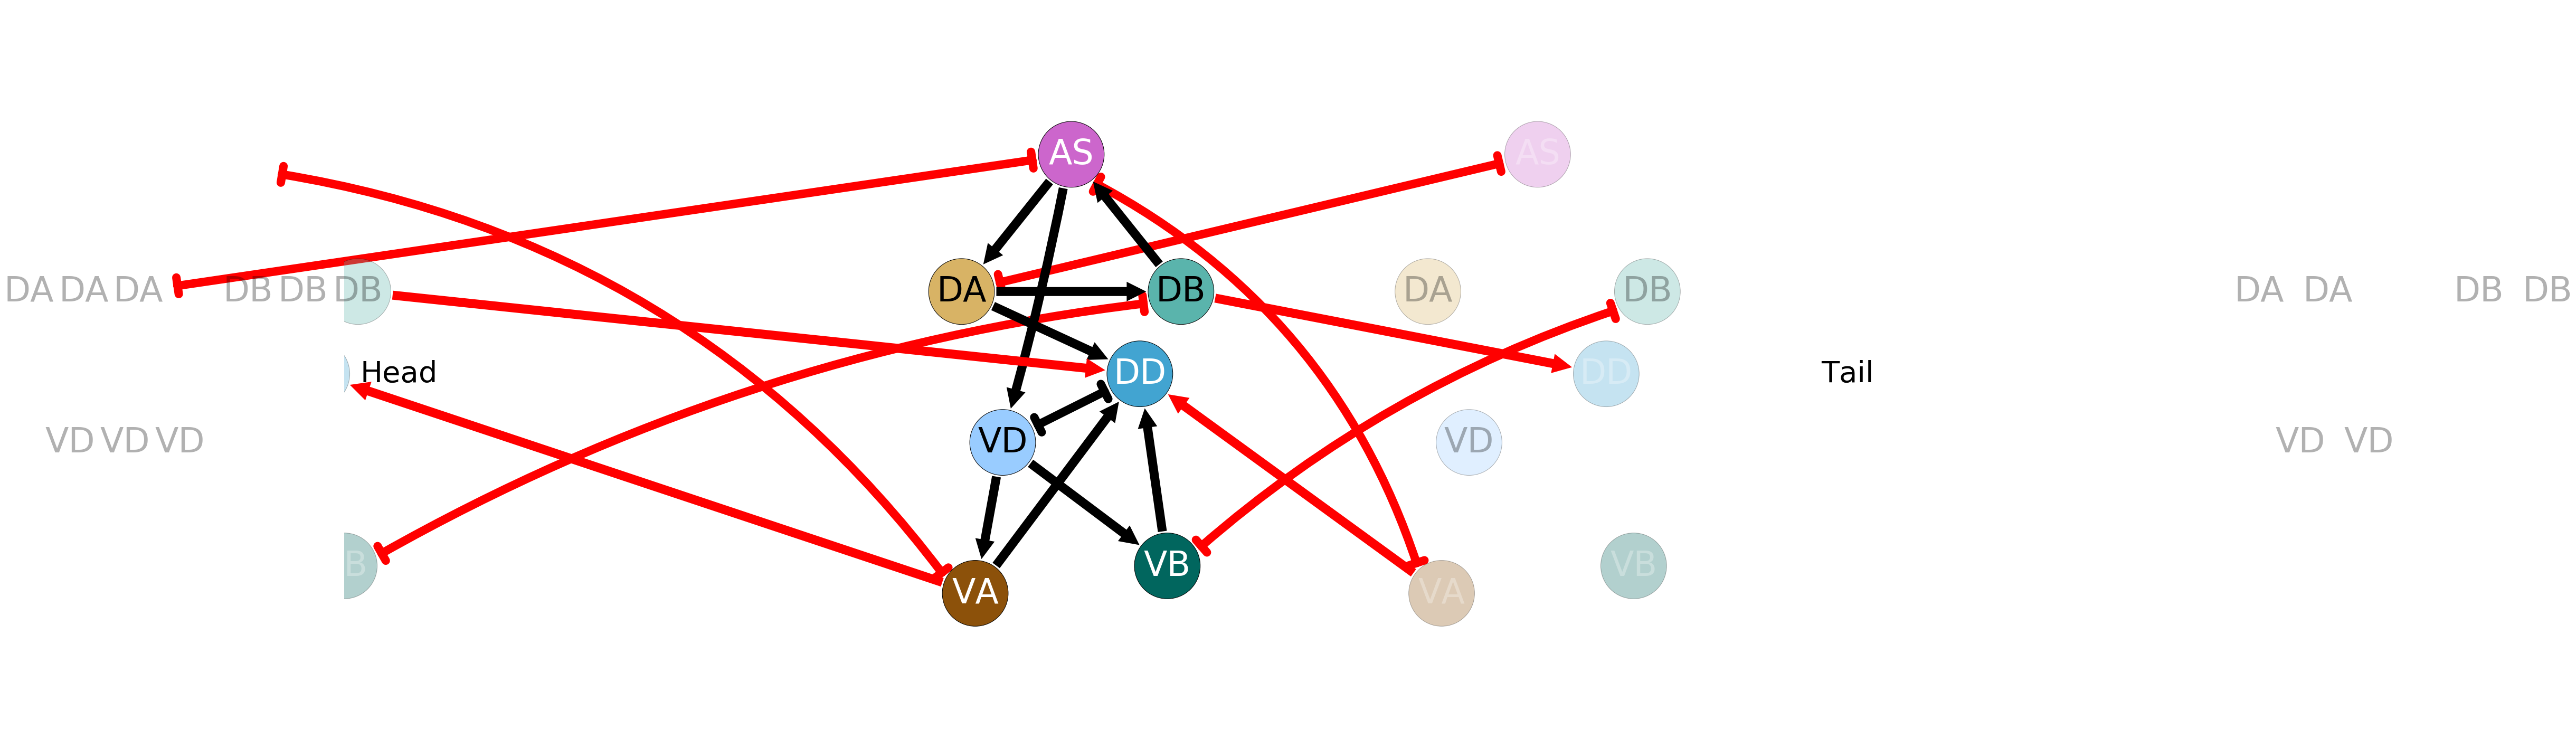

<Figure size 432x288 with 0 Axes>

In [51]:
plt.close('all')
fig = plt.figure(figsize = [41, 20])
R, Rr, Rgj = 1.2, 1.23, 1.4
gmain = gridspec.GridSpec(100, 100)
ax = plt.subplot(gmain[:,:])

######################################################################

#### intraunit synapses ####
curv = 0.00
intraunit_color = 'k'
for seg in [3]:#range(7):
    conectS_bold(ax, AS+seg*7, DA+seg*7, Rr, intraunit_color, curv)
    conectS_bold(ax, AS+seg*7, VD+seg*7, Rr, intraunit_color, -0.02)
    conectS_bold(ax, DA+seg*7, DB+seg*7, Rr, intraunit_color, curv)
    conectS_bold(ax, DB+seg*7, AS+seg*7, Rr, intraunit_color, curv)
    conectS_bold(ax, VD+seg*7, VA+seg*7, Rr, intraunit_color, curv)
    conectS_bold(ax, VD+seg*7, VB+seg*7, Rr, intraunit_color, curv)
    conectS_bold(ax, DA+seg*7, DD+seg*7, Rr, intraunit_color, curv)
    conectS_bold(ax, VB+seg*7, DD+seg*7, Rr, intraunit_color, curv)
    conectS_bold(ax, VA+seg*7, DD+seg*7, Rr, intraunit_color, curv)
    
    Gapjunction(ax, VD+seg*7, DD+seg*7, Rgj, intraunit_color, curv)

#### interunit synapses ####
interunit_color = 'r'
for seg in [2, 3]:#range(6):
    conectS_bold(ax, DB+seg*7, DD+(seg+1)*7, Rr, interunit_color, curv)
    conectS_bold(ax, VA+(seg+1)*7, DD+seg*7, Rr, interunit_color, curv)
    Gapjunction(ax, AS+seg*7, VA+(seg+1)*7, Rgj, interunit_color, -0.2)
    Gapjunction(ax, DA+seg*7, AS+(seg+1)*7, Rgj, interunit_color, curv)
    Gapjunction(ax, VB+seg*7, DB+(seg+1)*7, Rgj, interunit_color, -0.10)

##################################
##### DRAW THE CIRCLES ###########
##################################
#'''
fcolors = ['w','k', 'k', 'w', 'k', 'w', 'w']
circles = ['c%i' for i in range(len(labels))]
alphas = np.ones(49)*0.3
for i in range(21, 28): alphas[i] = 1.0
for n in np.arange(len(labels)):
    circles[n] = plt.Circle(positions[n], radius = R, fc = colors[n], edgecolor = 'k', lw = 1, alpha = alphas[n])
#    circles[n].set_alpha(alphas[i])
    t = ax.text(positions[n][0], positions[n][1], labels[n], color = fcolors[n%7], ha = 'center', va = 'center', fontsize = 65, alpha = alphas[n])
#    t.set_path_effects([path_effects.Stroke(linewidth=5, foreground='black'),
#                       path_effects.Normal()])
    ax.add_patch(circles[n])
#'''    

####################
### Draw muscles  ##
####################
#for m in [12, 13, 32, 33]: muscle_location[m][2] = ''
'''
blue = ['#f7fbff','#deebf7','#c6dbef','#9ecae1','#6baed6','#4292c6','#2171b5','#08519c','#08306b']
mfc, mec = '0.20', '0.50'
mfc, mec = '#a6611a', '#018571'
mfc, mec = '#a63603', '#fd8d3c'
mfc, mec = blue[6], blue[8]

mwidth, mhight = 11.1, 1.25
for i in [4, 5, 6]: colors[i] = '0.15'
for k, muscle in enumerate(muscle_location):
    if ((k>13)*(k<32)):
        if int(k/2) in [4, 5, 6, 10, 11, 12, 16, 17, 18, 19]:
            muscle.append(mfc)
        else:
            muscle.append(mec)
        ax.add_patch(mpatch.Ellipse(xy=[muscle[0], muscle[1]], width= mwidth, height=mhight, facecolor = muscle[3], edgecolor = 'k', alpha = 1.0))
        ax.text(muscle[0], muscle[1], muscle[2], color = 'w', fontsize = 50, ha = 'center', va = 'center')
#'''

ax.set_xlim(7.5, 64.3)
ax.set_ylim(-3.5 , 23.5)
ax.set_aspect('equal')
ax.axis('off')

ds = np.diff(mus_loc_x)[0]/2. 
ds0 = -12.16
dsp = 0

segment_color = '0.45'

'''
for i in range(50):
    ax.plot([ds0 + dsp + 0.2, ds0 + dsp + ds - 0.4], [-3.2, -3.2], lw = 19, color = segment_color)
    ax.plot([ds0 + dsp + 0.2, ds0 + dsp + ds - 0.4], [23.2, 23.2], lw = 19, color = segment_color)
    dsp += ds

print(dsp)
'''

ax.text(9.5, 10, 'Head', fontsize = 56, ha = 'center', va = 'center')
ax.text(62.3, 10, 'Tail', fontsize = 56, ha = 'center', va = 'center')

'''####################
#### save figure   ####
#####################'''
fig.subplots_adjust(left=0, bottom=0.00, right=1.0, top=1.0)
#plt.savefig('model.png')
#plt.savefig('model.pdf')
plt.figure()
plt.clf()